Enunciado del problema:
Implementa en Python una función con la siguiente cabecera
def integra_mc(fun, a, b, num_puntos=10000)
que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando
para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido,
comparándolo con el de aplicar la función scipy.integrate.quad de Python.
Debes implementar dos versiones del algoritmo, una iterativa que realice num_puntos iteraciones para calcular el resultado, y otra que utilice operaciones entre vectores en lugar de bucles,
comparando los tiempos de ejecución obtenidos con ambas versiones

In [2]:
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt

A continuación vamos a definir dos funciones, integra_mc y integra_mc_loop, ambas funciones van a tomar los siguientes argumentos:

- La función a integrar.
- El intervalo de integración (del tipo [a,b]).
- El numero de puntos que vamos a generar para calcular la integral.


In [ ]:
#Función bucle
def integra_mc_loop(fun =  lambda x: x**2, a = 0, b = 2, num_puntos = 10000):    
    #Inicializamos los dos arrays necesarios
    random_points = []
    fun_points = []
    num = 0
    #Generamos de manera aleatoria num_puntos equidistantes entre a y b.
    points = np.linspace(a, b, num_puntos)
    #Aplicamos al función a los puntos previamente generados para conseguir un "plot" de la función.
    fun_points = fun(points)
    #Obtenemos el máximo de la función en el intervalo.
    M = max(fun_points)
    #Con estos pasos hemos definido el rectangulo sobre el que vamos a lanzar los puntos en el siguiente paso.
    #Usando el loop generamos num_puntos aleatorios dentro de las dimensiones del rectángulo definido
    #(a, b) x (0, M)
    while num < num_puntos:
    #Generamos num_puntos aleatorios dentro del rectangulo definido uno a uno usando un while loop.
        random_points.append([np.random.uniform(a, b), np.random.uniform(0, M)])
        num+=1
    #Comprobamos cuales de los puntos se encuentran debajo de nuestra función.
    debajo = 0
    for punto in random_points:
        if (fun(punto[0]) >= punto[1]):
            debajo += 1
    
    #Calculamos la integral.
    int = (debajo/num_puntos)*(b-a)*M
    
    return int 

#Función vector
def integra_mc(fun =  lambda x: x**2, a = 0, b = 2, num_puntos = 10000): 
    #Generamos num_puntos aleatorios equidistantes en [a,b].
    points = np.linspace(a,b,num_puntos)
    #Aplicamos la función a los puntos generados y obtenemos la función.
    fun_points = fun(points)
    #Buscamos el máximo de la función en el intervalo.
    M = max(fun_points)
    #Generamos puntos aleatorios dentro del rectangulo definido por el intervalo y el máximo de la función.
    x = np.random.uniform(a, b, num_puntos)
    y = np.random.uniform(0, M, num_puntos)
    
    #Calculamos los puntos por debajo de la función, usamos la función count_nonzero de numpy, esta calcula cuantos de los elementos del array 
    #(generado por la comparación del array de y la aplicación de la función sobre el array de x) son menores de cero, 
    #al ser True = 1 en python obtenemos una cuenta de los elementos que se encuentran por debajo de la función.
    #debajo = np.count_nonzero(y <= fun(x))
    debajo = np.count_nonzero(y <= fun(x))
    #Calculamos la integral.
    int = (debajo/num_puntos)*(b-a)*M
    
    return int

fun = lambda x: x**2

#Comprobamos los valores de las 
print(integra_mc(fun))
print(integra_mc_loop(fun))
print(scipy.integrate.quad(fun, 0, 2))


    
    
    
    
    

2.6504
2.6216
(2.666666666666667, 2.960594732333751e-14)


A continuación adaptamos la función "compara_tiempos_dot()" en el código que nos ha proporcionado la profesora para calcular el tiempo que tarda cada versión de la fubnción en ejecutarse basandose en el número de puntos que generamos en cada ocasión.
Usaremos la librería matplotlib para conseguir un gráfico que visualize la diferencia en los tiempos de ejecución. 

(2.666666666666667, 2.960594732333751e-14)
2.7112
2.6456


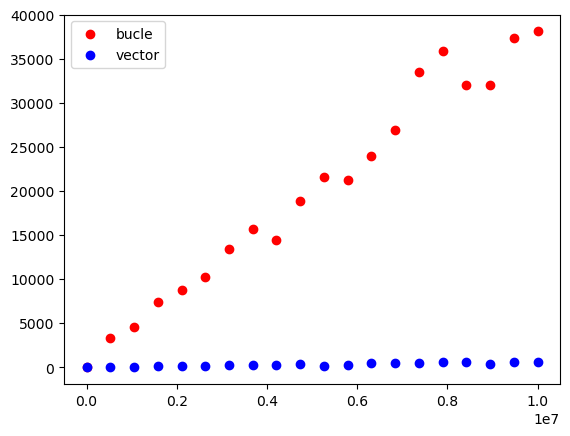

In [6]:
def compara_tiempos(fun1 , fun2):
    #Generamos los diferentes valores con los que vamos a testear las funciones.
    sizes = np.linspace(100, 10000000, 20)
    times_dot = []
    times_fast_dot = []
    #Para cada valor generado probamos la rapidez de cada función
    for size in sizes:
        tic = time.process_time()
        fun1(num_puntos = int(size))
        toc = time.process_time()
        times_dot += [1000 * (toc - tic)]
        tic = time.process_time()
        fun2(num_puntos = int(size))
        toc = time.process_time()
        times_fast_dot += [1000 * (toc - tic)]
    #Una vez tenemos los datos hacemos el plot de los resuktados.
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend()
    plt.savefig('compara tiempos dot.png')

print(scipy.integrate.quad(fun, 0, 2))
print(integra_mc_loop())
print(integra_mc())
compara_tiempos(integra_mc_loop,integra_mc)


Como se puede observar en la gráfica el numero de puntos generados y el tiempo que tarda la función integra_mc_loop() es directamente proporcional, es deicr, a más puntos aleatorios generados para determinar la integral mayor será el tiempo que la función necesitará para acabar su ejecución, esto se debe a los siguientes factores:
- Se usa un número considerable de llamadas a la función numpy.random.uniform() para generar puntos aleatorios, este número se ve directamente afectado por el incremento en el argumento num_puntos.
- Cuenta con dos loops que si bien no están anidados suponen un peso grande para el tiempo de ejecución de la función, además de verse directamente afectados por el incremento del argumento num_puntos.

Al contrario en la función interga_mc() si bien también se observa una pequeña subida en el tiempo de ejecución pero es mucho menor a la observada en la versión anterior de la función, los motivos por los que se puede observar esa mejora son los siguientes:
- La cantidad de llamadas necesarias para la generación de puntos aleatorios se desvincula de la variable num_puntos, si bien el número de puntos a generar no varía la cantidad de llamadas necesaria si, lo cual reduce el tiempo de ejecución.
- Se eliminan los loops presentes en la versión anterior y se simplifica la generación de puntos (ya no se crean de uno en uno si no en un array con tamaño num_puntos). 

Así podemos ver que el tamaño de los bucles esta directamente relacionado con el tamaño de ejecución del programa.